# Ciencia de datos con R: Fundamentos Estadísticos

---

**Alumno**: Leandro Carreira

**LU**: 669/18

---

# $$\Large \mathcal 7.$$

Implemente una función `class.nopar` que dado un punto $x_{new}$ determine la **clase** a la que pertenece el nuevo individuo que tiene este valor en la covariable mediante la **regla plug–in de Bayes** $\widehat g$ basada en las estimaciones **no paramétricas** de las densidades $f_1$ y $f_0$ usando **núcleo gaussiano**.

Para ello entrar como input de la función implementada el punto $x_{new}$, los vectores de datos $X_{datos}$ e $Y_{datos}$ y las ventanas $h_1$ y $h_0$ : $\text{class.nopar}(x_{new}, X_{datos}, Y_{datos},h_1 ,h_0)$.

In [38]:
class.nopar <- function(xnew, X, Y, h1, h0){
    # Asume clase y=1 para variedad 1,
    #       clase y=0 para variedad 2
    n <- length(Y)
    # Estimación de priors
    prior1 <- sum(Y==1) / n
    prior0 <- sum(Y==0) / n

    # Estimación de densidades
    f1.h1 <- density(X[Y==1], bw=h1, kernel='gaussian', n=1, from=xnew, to=xnew)$y
    f0.h0 <- density(X[Y==0], bw=h0, kernel='gaussian', n=1, from=xnew, to=xnew)$y
    
    g_h0.h1 <- as.numeric(f1.h1 * prior1 >= f0.h0 * prior0)
    
    return(g_h0.h1)
}

In [39]:
class.nopar.12 <- function(xnew, X, Y, h1, h0){
    # Asume clase y=1 para variedad 1,
    #       clase y=2 para variedad 2
    # Convierto 2s en 0s
    Y.10 <- Y - 2 * (Y==2)
    g_h0.h1 <- class.nopar(xnew, X, Y10, h1, h0)
    if(g_h0.h1==0){
        return (2)
    }else{
        return (1)
    }
}

### Influencia de la ventana $h$ en la frontera de clasificación

Se grafica para cada $h$ en una grilla de valores

* **Ajuste de densidades** marginales con núcleo gaussiano
* **Valores puntuales** de *Height* separados por categoría
* ***Threshold*** de clasificación

> **Observar** cómo el límite de clasificación "se mueve" a la izquierda en favor de la clase 0, hasta clasificar todo como cero.
>
> Esto se debe a que a medida que aumentamos h, las distribuciónes estimadas se vuelven más parecidas, y el valor del prior gana más peso, considerando solo la proporción de valores en los datos.
>
> Demo de esto debajo de los gráficos.



In [33]:
datos <- read.table('hongos_clasificados.txt', header=T)

In [34]:
X <- datos[,1]
Y <- datos[,2]
Y.10 <- Y - 2 * (Y==2)

In [35]:
var1 <- datos[datos$Variety == 1,1]
var2 <- datos[datos$Variety == 2,1]

In [36]:
f1 <- density(var1)
f2 <- density(var2)

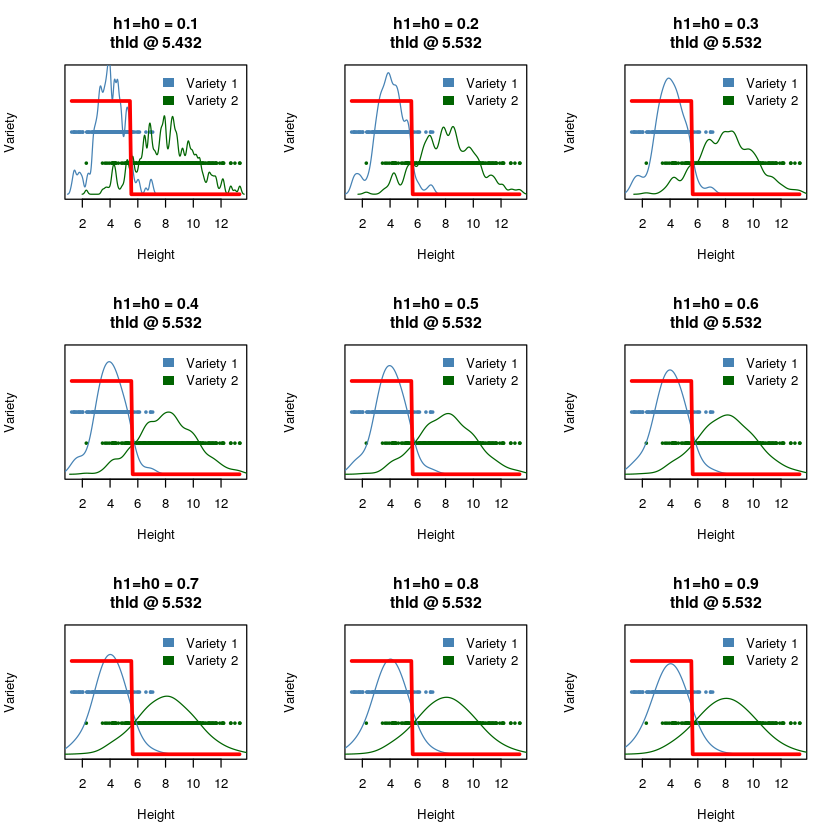

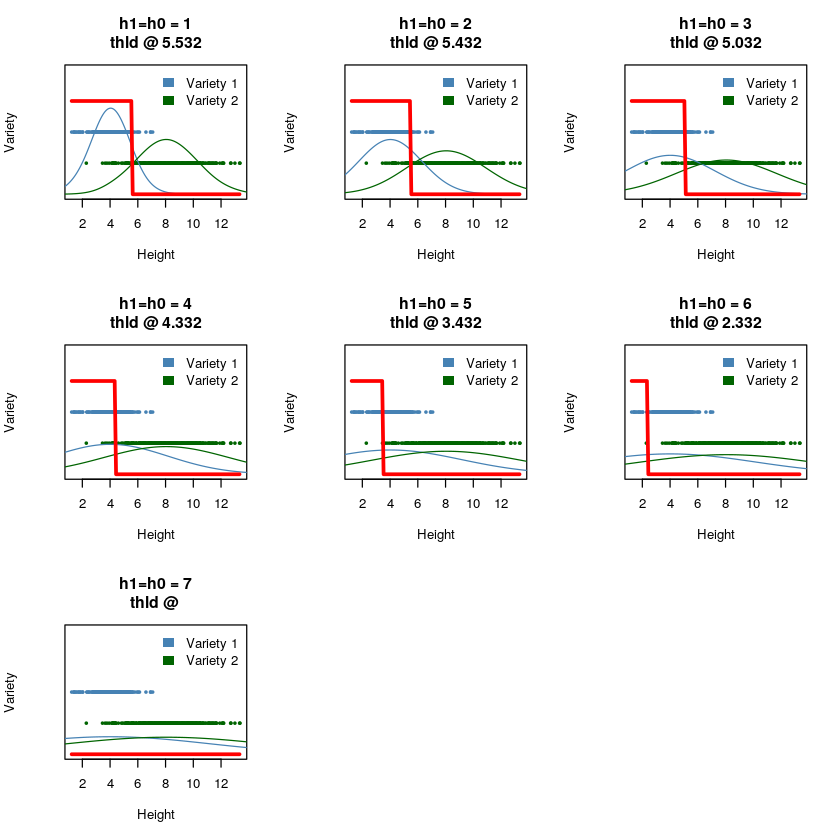

In [40]:
par(mfrow=c(3,3))
gridx <- seq(min(X), max(X), 0.1)
m <- length(gridx)
hs <- c(seq(0.1, 1, 0.1), seq(2,7))
for(h in hs){
    pred.class <- rep(NA, m)
    for(i in 1:m){
        xnew <- gridx[i]
        pred.class[i] <- class.nopar(xnew=xnew, X=X, Y=Y.10, h1=h, h0=h)
    }
    thld <- gridx[sum(pred.class[pred.class==1])]
    plot(datos[datos$Variety == 1,1], rep(0.2, sum(datos$Variety == 1)), col='steelblue',
     ylim=c(0,0.4), xlim=c(min(datos$Height), max(datos$Height)),
     xlab='Height', ylab='Variety', yaxt='n', main=paste0('h1=h0 = ',h,'\nthld @ ',thld), cex=0.6, pch=20)
    points(datos[datos$Variety == 2,1], rep(0.1, sum(datos$Variety == 2)), cex=0.6, pch=20,  col='darkgreen')
    lines(density(var1, bw=h), xlim=c(min(datos$Height), max(datos$Height)), col='steelblue', lwd=1)
    lines(density(var2, bw=h), col='darkgreen', lwd=1)
    
    lines(gridx, pred.class*0.3, col='red', lwd=3)
    legend('topright', c('Variety 1', 'Variety 2'), fill=c('steelblue','darkgreen','red'), bg=NA, border=NA, box.lty=0)

    
}

## Regla optima de Bayes - Caso binario

Sabemos que la condicion correspondiente a la categoría 1 es:

$$\Large g^{op}(x) = 1 \ \ \text{si:}\ \  f_1(x) \ \mathbb P(Y=1) > f_0(x) \  \mathbb P(Y=0)$$

Donde **si ambas densidades tienen valores muy similares para todo x**, la ecuación tiende a convertirse en $*$

$$\Large g^{op}(x) \stackrel{*}{=} 1 \ \ \text{si:}\ \ \mathbb P(Y=1) >  \mathbb P(Y=0)$$


Observar proporciones de los datos:

In [46]:
sum(Y==1)
sum(Y==2)

[1] 200

[1] 300

Por lo que siempre valdrá que el prior de $Y=1$ sea MENOR a $Y=0$, categorizando toda X como de la variedad 2 (clase 0)

---